In [ ]:
!pip install pandas numpy scikit-learn seaborn matplotlib


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
from google.colab import files
uploaded = files.upload()


Saving KDDTrain+.txt to KDDTrain+.txt


In [5]:
# Load training data
train_df = pd.read_csv('KDDTrain+.txt', header=None)
test_df = pd.read_csv('KDDTest+.txt', header=None)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (125973, 43)
Test shape: (22544, 43)


In [6]:
columns = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
    'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
    'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login',
    'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
    'diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
    'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
    'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','label','difficulty_level'
]

train_df.columns = columns
test_df.columns = columns


In [7]:
# Remove difficulty level
train_df = train_df.drop(['difficulty_level'], axis=1)
test_df = test_df.drop(['difficulty_level'], axis=1)

# Encode categorical features
cat_cols = ['protocol_type', 'service', 'flag']
le = LabelEncoder()
for col in cat_cols:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# Encode labels: normal vs attack
train_df['label'] = train_df['label'].apply(lambda x: 'normal' if x == 'normal' else 'attack')
test_df['label'] = test_df['label'].apply(lambda x: 'normal' if x == 'normal' else 'attack')


In [8]:
# Split into features and target
X_train = train_df.drop(['label'], axis=1)
y_train = train_df['label']
X_test = test_df.drop(['label'], axis=1)
y_test = test_df['label']

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

      attack       0.97      0.62      0.76     12833
      normal       0.66      0.97      0.79      9711

    accuracy                           0.77     22544
   macro avg       0.81      0.80      0.77     22544
weighted avg       0.83      0.77      0.77     22544

Confusion Matrix:
 [[7987 4846]
 [ 279 9432]]


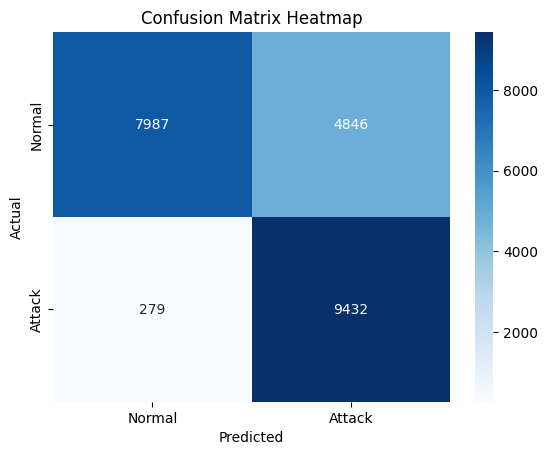

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [11]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred2))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Report:
              precision    recall  f1-score   support

      attack       0.90      0.49      0.64     12833
      normal       0.58      0.93      0.72      9711

    accuracy                           0.68     22544
   macro avg       0.74      0.71      0.68     22544
weighted avg       0.76      0.68      0.67     22544



In [12]:
import joblib
joblib.dump(model, 'nids_model.pkl')  # saves the trained model


['nids_model.pkl']

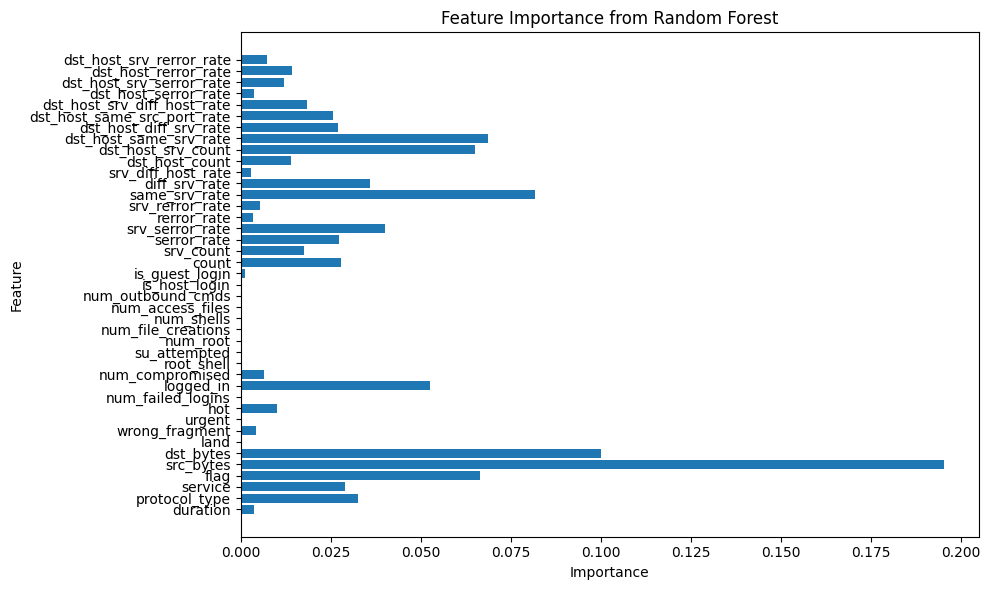

In [13]:
import matplotlib.pyplot as plt

# Get feature importances from RandomForest
importances = model.feature_importances_
features = X_train.columns

# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()


In [17]:
import os

# List all files in current Colab directory
for file in os.listdir():
    print(file)


.config
nids_model.pkl
KDDTest+.txt
sniff_packets.py
KDDTrain+.txt
sample_data


In [18]:
from google.colab import files

# Download the model file
files.download('nids_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>